In [475]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Please ultilize dir and help to find class or package
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from plotly import graph_objects as go
# Setup pd
pd.options.display.max_columns = 30

## Kumpulan method untuk display dan semacamnya

In [476]:
def cmDisplay(confusion_matrix, judul=""):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix '+judul, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def tampilkan_score(y_train, y_test, y_pred_train, y_pred):
    # Evaluasi dari Model
    print ("\033[31mTrain Accuracy: " , metrics.accuracy_score (y_train , y_pred_train))
    print ("Test Accuracy: " , metrics.accuracy_score (y_test , y_pred))
    print ("F1 Score: ", f1_score (y_test , y_pred , average = "macro"))
    print ("Precision Score: ", precision_score (y_test , y_pred , average = "macro" ))
    print ("Recall Score: ", recall_score (y_test , y_pred , average = "macro" )) 
    print ('\n\33[33m',classification_report (y_test , y_pred))

## Prepare the data

In [477]:
raw_data = pd.read_csv("data/mobile_classification - Train.csv")
raw_data = raw_data.drop(columns=['Unnamed: 0'])
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [478]:
raw_data.shape

(2000, 21)

In [479]:
# Display data yg duplicate
raw_data[raw_data.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [480]:
raw_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [481]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Visualisasi persebaran data dari setiap variabel predictor

Menggunakan method `nunique` untuk mengetahui keunikan data, dari sini bisa menentuka apakah variable data diskrit atuau data kontinu

In [482]:
## Menampilan uniq value dari setiap kolom
data_diskrit = raw_data.nunique()[(raw_data.nunique() <= 8) & (raw_data.nunique() != 4)].index.to_list() ## Bilangan bulat
data_kontinue = raw_data.nunique()[(raw_data.nunique() > 8) & (raw_data.nunique() != 4)].index.to_list()

print(data_diskrit)
print(data_kontinue)

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


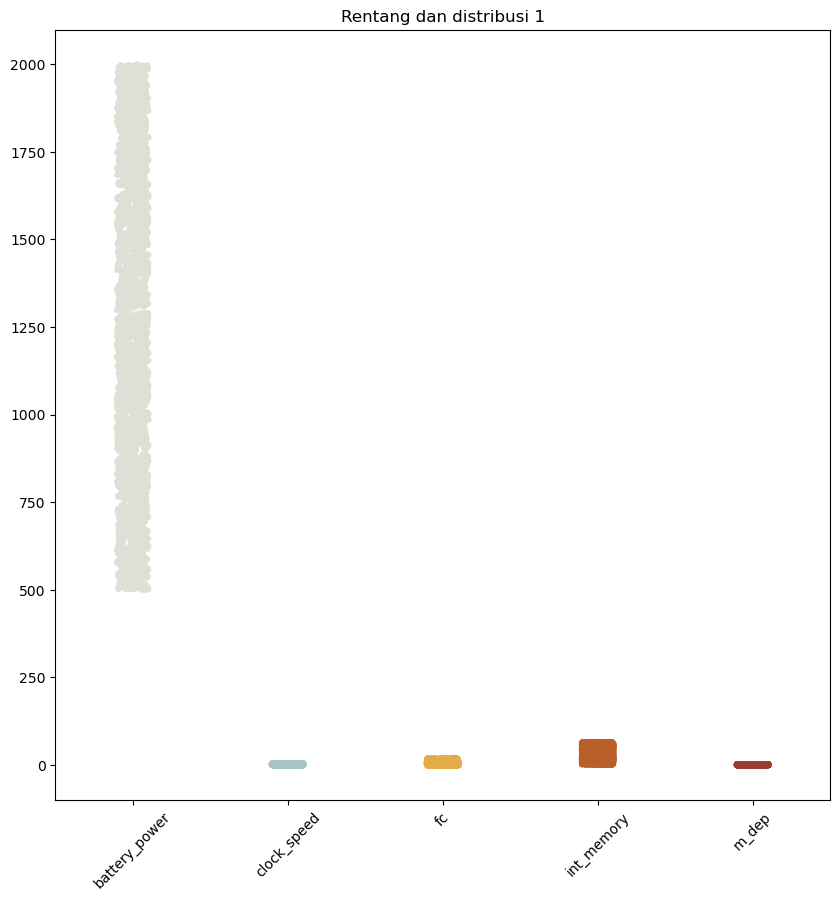

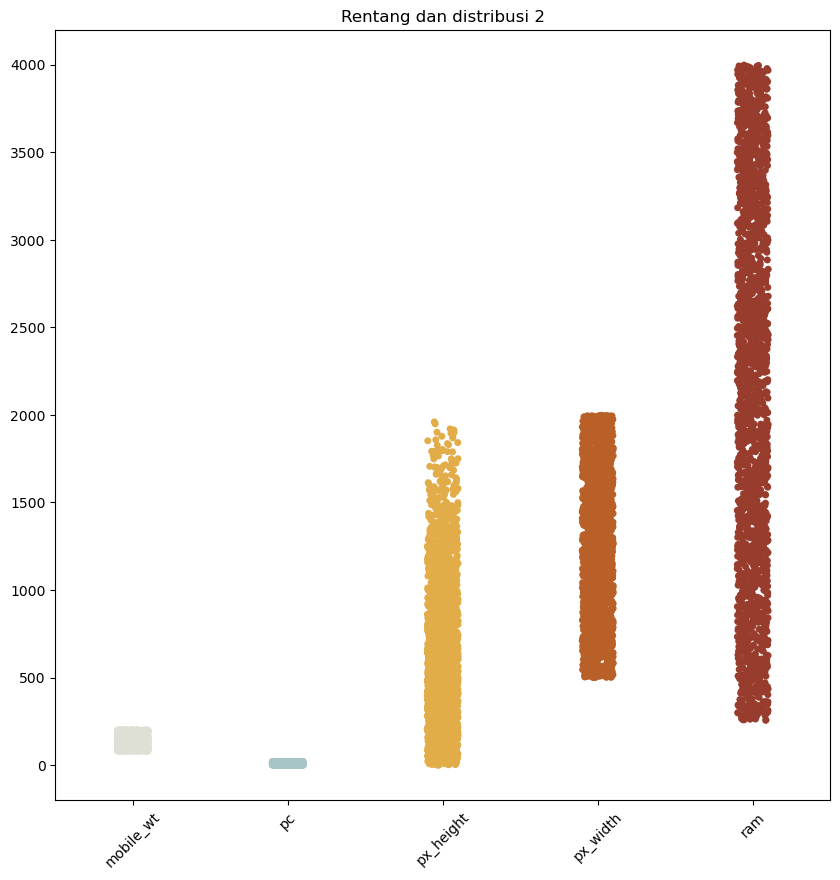

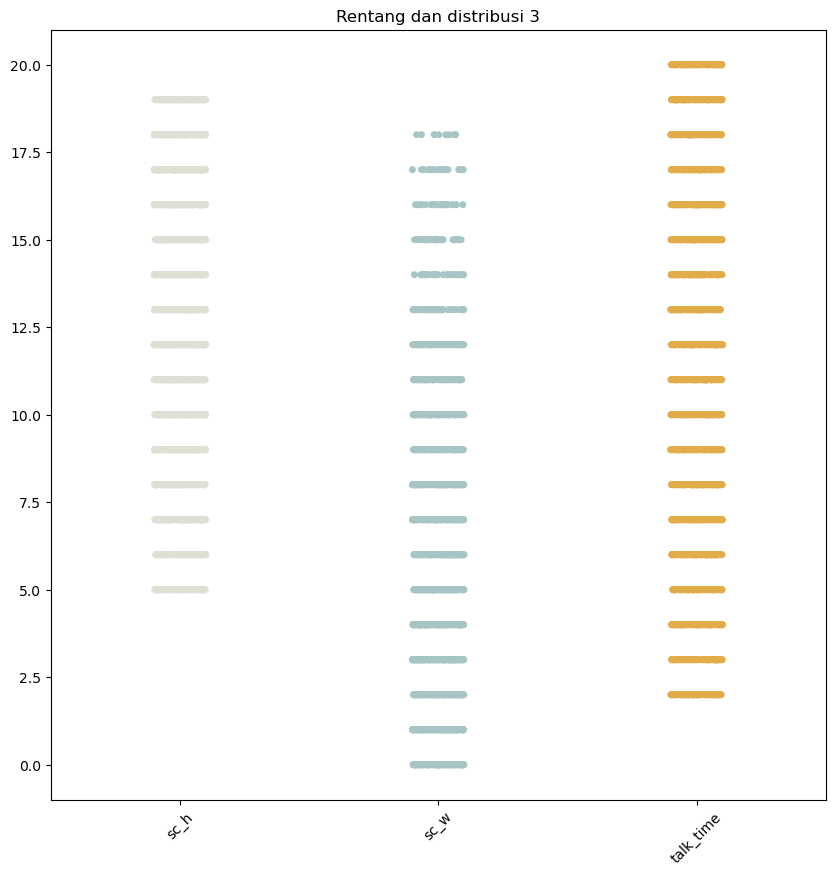

In [483]:
palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']
# print(data_kontinue[10:])
#Ploting distribution and range of each column
plt.figure(figsize = (10,10))
plt.title("Rentang dan distribusi 1")
plt.xticks(rotation=45)
df_cont1 = raw_data[data_kontinue[0:5]]
sns.stripplot( data = df_cont1  , palette= palette )
plt.show()

#Ploting distribution and range of each column
plt.figure(figsize = (10,10))
plt.title("Rentang dan distribusi 2")
plt.xticks(rotation=45)
df_cont1 = raw_data[data_kontinue[5:10]]
sns.stripplot( data = df_cont1  , palette= palette )
plt.show()

palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48']
#Ploting distribution and range of each column
plt.figure(figsize = (10,10))
plt.title("Rentang dan distribusi 3")
plt.xticks(rotation=45)
df_cont1 = raw_data[data_kontinue[10:]]
sns.stripplot( data = df_cont1  , palette= palette )
plt.show()

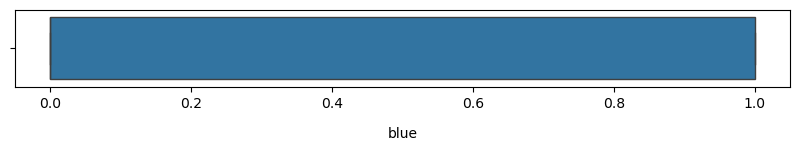

blue


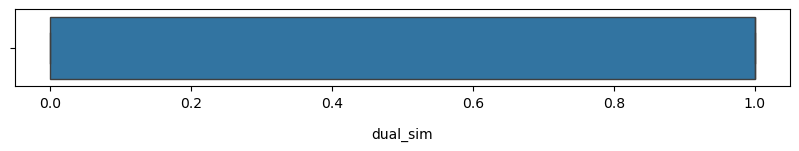

dual_sim


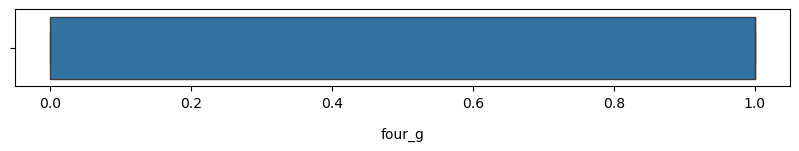

four_g


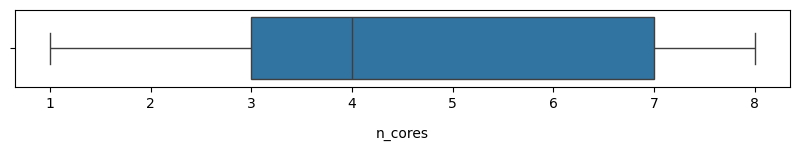

n_cores


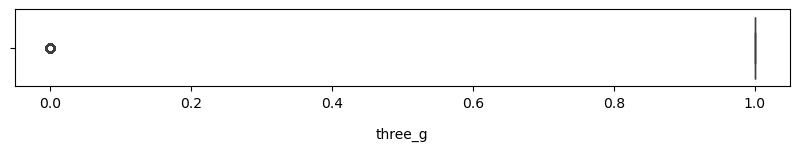

three_g


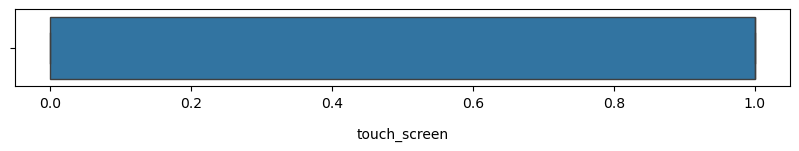

touch_screen


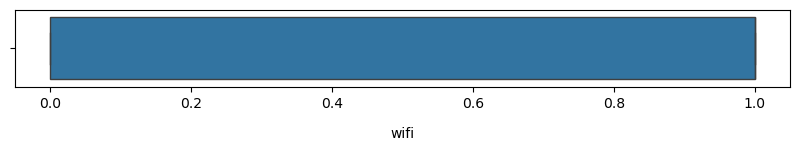

wifi


In [484]:
for a in data_diskrit:
    plt.figure(figsize=(10,1))
    sns.boxplot(x = raw_data[a], linewidth=1, showfliers=True)
    plt.xlabel(a, labelpad = 12)
    plt.show()
    print (a)

## Data Describvem

In [485]:
raw_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Data Explenation

Variabel Prediction (Dependent) pada kasus ini adalah **Price Range** yang ditentukan oleh nilai 0 ~ 3 (Murah ~ Sangat Mahal)

#### Unique data actual price

In [486]:
raw_data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### Split data predictor and prediction also train and test

In [487]:
X = raw_data.drop(columns=['price_range'])
y = raw_data[['price_range']]

In [488]:
X.shape, y.shape

((2000, 20), (2000, 1))

In [489]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Membuat Model

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.20)

print ('X Train',X_train.shape)
print ('X Test',X_test.shape)
print ('y Train',y_train.shape)
print ('y Test',y_test.shape)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

X Train (1600, 20)
X Test (400, 20)
y Train (1600, 1)
y Test (400, 1)


DecisionTreeClassifier()

In [491]:
y_pred = classifier.predict (X_test) # predicting
y_pred_train = classifier.predict (X_train)
confusion_matrix = cm(y_test, y_pred)
confusion_matrix_train = cm(y_train, y_pred_train)

tampilkan_score(y_train, y_test, y_pred_train, y_pred)

Train Accuracy:  1.0
Test Accuracy:  0.82
F1 Score:  0.8134895892460535
Precision Score:  0.8170075970152355
Recall Score:  0.8144330307373786

               precision    recall  f1-score   support

           0       0.91      0.87      0.89       105
           1       0.72      0.84      0.78        91
           2       0.77      0.66      0.71        92
           3       0.86      0.89      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



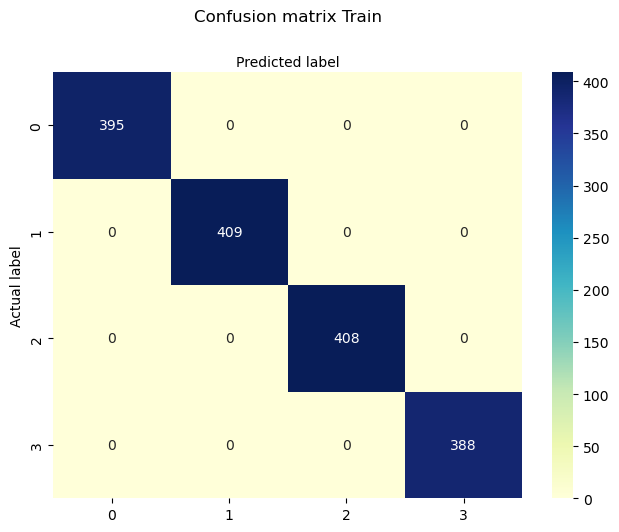

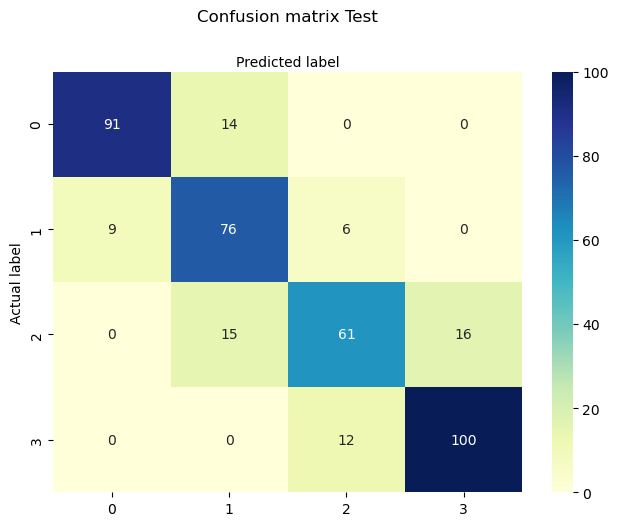

In [492]:
cmDisplay(confusion_matrix_train,"Train")
print('\n'*2)
cmDisplay(confusion_matrix,"Test")

Dari hasil train accuracy menggunakan model pada data train dan data test kita dapat bahwa data train mencapai angka 1 sedangka menggunakan data test hasilnya 0.82. Dari gambaran tersebut dapat kita identifikasi bahwa model yang kita lakukan _overfitting_.

* [Train Accuracy 100% and Test Accuracy less than that, it is posible as overfitting](https://stats.stackexchange.com/a/278931)
* [More about overfitting](https://datascience.stackexchange.com/a/74686)

## Membuat Model Dengan Cost Complexity Prunning

In [493]:
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth = 9,random_state=0)

# random_stateint, RandomState instance or None, default=None
# Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best".
# When max_features < n_features, the algorithm will select max_features
# at random at each split before finding the best split among them.
# But the best found split may vary across different runs, even if max_features=n_features. 
# That is the case, if the improvement of the criterion is identical for several splits and one split has 
# to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
# See Glossary for details.

In [494]:
path = model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

Number of nodes in the last tree is: 1 with ccp_alpha: 0.6659055205479465


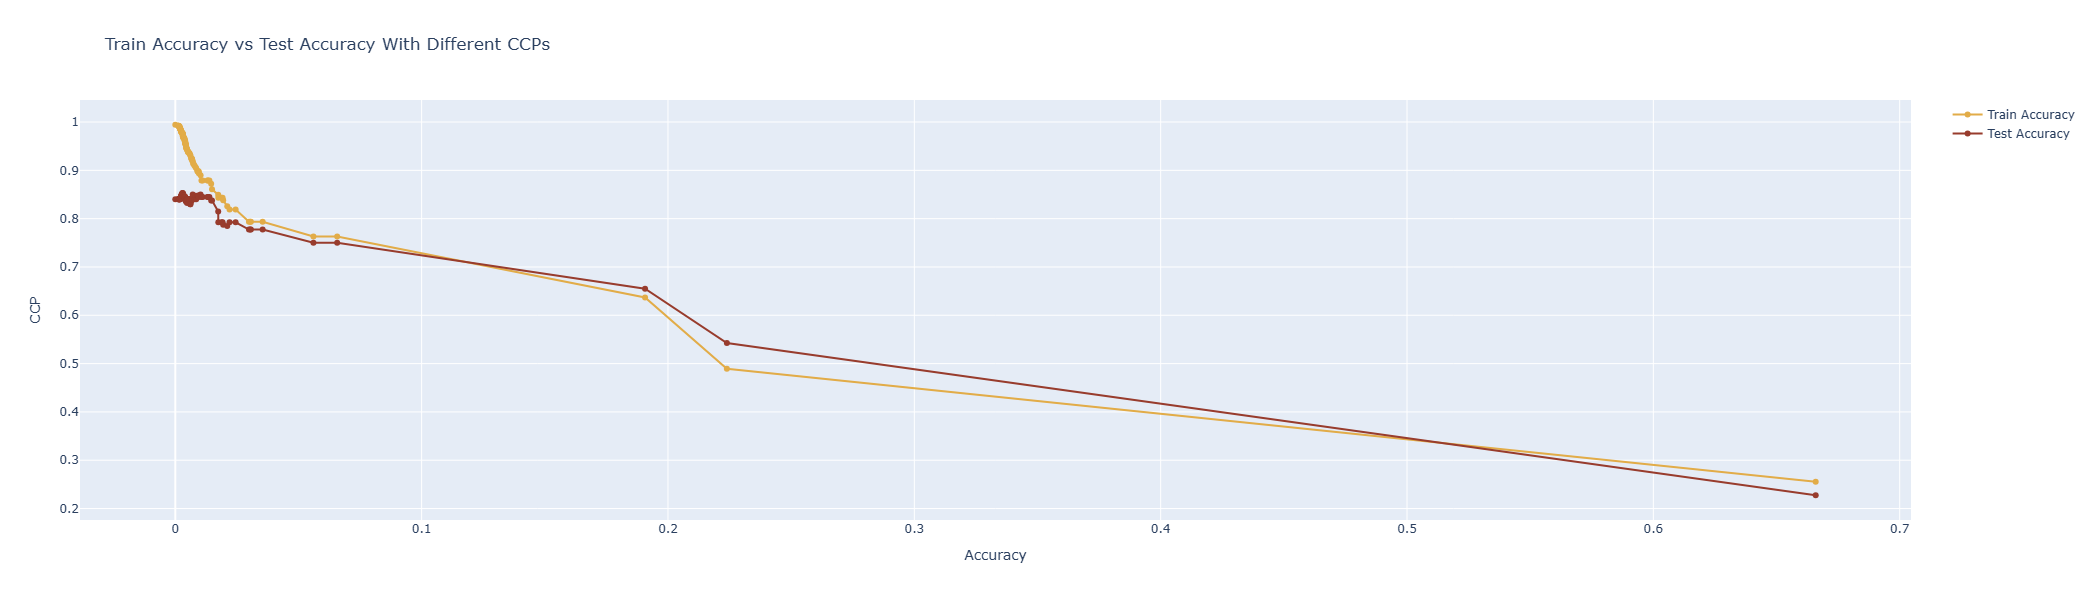

In [495]:
## Menemukan cost complexity alpah
clfs = []
train_accuracy = []
test_accuracy = []
for n in ccp_alphas:
    model_best_alpha = DecisionTreeClassifier(criterion='entropy', max_depth = 9,random_state=0, ccp_alpha=n)
    model_best_alpha.fit(X_train, y_train)
    clfs.append(model_best_alpha)
    train_accuracy.append(model_best_alpha.score(X_train, y_train))
    test_accuracy.append(model_best_alpha.score(X_test, y_test))
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

#plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_accuracy,
                    mode='lines+markers',
                    name='Train Accuracy',
                        line = dict(color='#E2AC48' , width=2)))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_accuracy,
                    mode='lines+markers',
                    name='Test Accuracy',
                        line = dict(color='#983C2D' , width=2)))
fig.update_layout(
    title='Train Accuracy vs Test Accuracy With Different CCPs',
    xaxis_title='Accuracy',
    yaxis_title='CCP',
    width=1000, 
    height=600,
    # plot_bgcolor='#DEE0D5'
)
cmap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , ]
fig.show()

Number of nodes in the last tree is: 11 with ccp_alpha: 0.03545892785718027


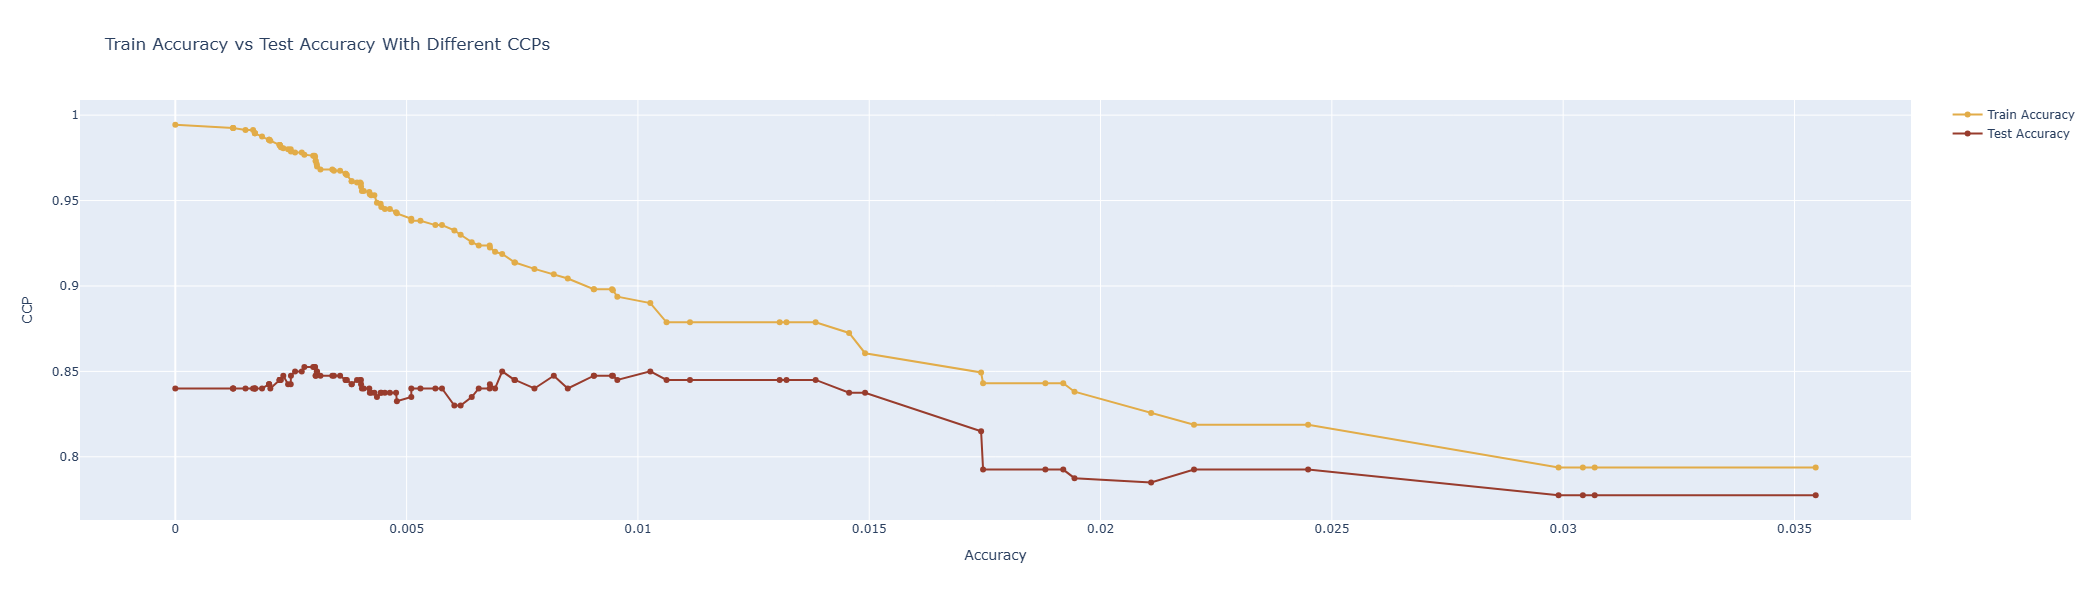

In [496]:
## Menemukan cost complexity alpha
clfs = []
train_accuracy = []
test_accuracy = []
avarage = []
ccp_alphas = ccp_alphas[ccp_alphas < 0.04]

for n in ccp_alphas:
    model_best_alpha = DecisionTreeClassifier(criterion='entropy', max_depth = 9,random_state=0, ccp_alpha=n)
    model_best_alpha.fit(X_train, y_train)
    clfs.append(model_best_alpha)
    train_accuracy.append(model_best_alpha.score(X_train, y_train))
    test_accuracy.append(model_best_alpha.score(X_test, y_test))
    avarage.append((model_best_alpha.score(X_train, y_train)+model_best_alpha.score(X_test, y_test))/2)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

#plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_accuracy,
                    mode='lines+markers',
                    name='Train Accuracy',
                        line = dict(color='#E2AC48' , width=2)))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_accuracy,
                    mode='lines+markers',
                    name='Test Accuracy',
                        line = dict(color='#983C2D' , width=2)))
fig.update_layout(
    title='Train Accuracy vs Test Accuracy With Different CCPs',
    xaxis_title='Accuracy',
    yaxis_title='CCP',
    width=1000, 
    height=600,
    # plot_bgcolor='#DEE0D5'
)
cmap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , ]
fig.show()